In [7]:
import numpy as np
import shutil
import os
from matplotlib import pyplot as plt

import sys
sys.path.append("../utils/")
sys.path.append("../calculating_predictions")
sys.path.append("../evaluation/")
from calculate_predictions import calculate_predictions
from evaluate import evaluate
from run_evaluation import *
from argparse import Namespace
from catboost import CatBoostRegressor, CatBoostClassifier
from constants import FEATURES_NUMBER

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
def get_baseline_metric(train_days, test_days, position_features_num, max_clicks):
    args = Namespace()
    args.verbose = True
    args.first_feature = 0
    args.last_feature = FEATURES_NUMBER
    args.data_folder = "../../../data/pool_with_queries/train_test_split/"
    args.out_folder = "res"
    args.type = "regression"
    args.position_features_num = position_features_num
    args.labels_to_substruct = None
    args.metric_folder = "metrics"
    args.model_constructor = lambda verbose: CatBoostRegressor(verbose=False)
    #args.model_constructor=lambda verbose, max_clicks: CatBoostClassifier(
    #    verbose=False,
    #    loss_function='MultiClass',
    #    classes_count=max_clicks + 2
    #)
    args.additional_features = None
    args.add_base_features = True
    args.train_days = train_days
    args.validation_day = None
    args.test_days = test_days
    
    def clear(folder):
        if os.path.exists(folder):
            shutil.rmtree(folder)
        os.mkdir(folder)
    
    clear(args.out_folder)
    clear(args.metric_folder)
    
    calculate_predictions(args)
    evaluate(args.out_folder, args.data_folder, args.metric_folder, expect_argmax_positions)
    
    with open("metrics/metrics.txt") as handler:
        metric = float(next(handler).strip().split()[0])
        return metric

In [3]:
train_days_list = [
    (0, 1, 2),
    (1, 2),
    (2,)
][1:]
position_features_nums = (1, 2)

In [4]:
%%time
metrics = {}
predictions = {}
for train_days in train_days_list:
    for position_features_num in position_features_nums:
        metrics[(train_days, position_features_num)] = [
            get_baseline_metric(
                train_days=train_days,
                test_days=[3],
                position_features_num=position_features_num
            ) for i in range(10)
        ]
        prediction = np.load("res/train_{}_test_3.npy".format('_'.join(map(str, train_days))))
        prediction = prediction[np.random.permutation(len(prediction))[:100]]
        predictions[(train_days, position_features_num)] = prediction

        print()
        print()
        print(" finished {}".format((train_days, position_features_num)))
        print()
        print()

 "2018-06-25 15:11:01.563993": preprocesing started
 "2018-06-25 15:11:03.317984":     base features shape: (142276, 17)
 "2018-06-25 15:11:03.321705":     0 features added
 "2018-06-25 15:11:03.321752":     base features not included
 "2018-06-25 15:11:03.321864":     result shape: (142276, 17)
 "2018-06-25 15:11:05.077375":     base features shape: (142276, 17)
 "2018-06-25 15:11:05.080399":     0 features added
 "2018-06-25 15:11:05.080448":     base features not included
 "2018-06-25 15:11:05.080537":     result shape: (142276, 17)
 "2018-06-25 15:11:05.087254": train features shape: (284552, 17)
 "2018-06-25 15:11:07.733092": preprocesing finished
 "2018-06-25 15:11:07.733185": start training on days (1, 2)
 "2018-06-25 15:11:07.733205": using fit without validation
 "2018-06-25 15:11:50.896097": built 1000 trees
 "2018-06-25 15:11:50.896194": saving model in path "tmp_129177/tmp_model_trained_on_1_2"
 "2018-06-25 15:11:55.423102":     base features shape: (1565036, 17)
 "2018-06-

 "2018-06-25 15:16:06.449872":     base features shape: (142276, 17)
 "2018-06-25 15:16:06.453357":     0 features added
 "2018-06-25 15:16:06.453407":     base features not included
 "2018-06-25 15:16:06.453496":     result shape: (142276, 17)
 "2018-06-25 15:16:06.459649": train features shape: (284552, 17)
 "2018-06-25 15:16:09.049682": preprocesing finished
 "2018-06-25 15:16:09.049790": start training on days (1, 2)
 "2018-06-25 15:16:09.049810": using fit without validation
 "2018-06-25 15:16:50.861340": built 1000 trees
 "2018-06-25 15:16:50.861450": saving model in path "tmp_725637/tmp_model_trained_on_1_2"
 "2018-06-25 15:16:55.259706":     base features shape: (1565036, 17)
 "2018-06-25 15:16:55.289428":     0 features added
 "2018-06-25 15:16:55.289524":     base features not included
 "2018-06-25 15:16:55.289631":     result shape: (1565036, 17)
 "2018-06-25 15:16:55.291201": days to predict: [3]
 "2018-06-25 15:16:55.291256": loaded model from: tmp_725637/tmp_model_trained

 "2018-06-25 15:21:09.705902": preprocesing finished
 "2018-06-25 15:21:09.705982": start training on days (1, 2)
 "2018-06-25 15:21:09.706001": using fit without validation
 "2018-06-25 15:21:53.818280": built 1000 trees
 "2018-06-25 15:21:53.818357": saving model in path "tmp_388881/tmp_model_trained_on_1_2"
 "2018-06-25 15:21:58.529232":     base features shape: (1565036, 18)
 "2018-06-25 15:21:58.561797":     0 features added
 "2018-06-25 15:21:58.561870":     base features not included
 "2018-06-25 15:21:58.561982":     result shape: (1565036, 18)
 "2018-06-25 15:21:58.563686": days to predict: [3]
 "2018-06-25 15:21:58.563760": loaded model from: tmp_388881/tmp_model_trained_on_1_2
 "2018-06-25 15:21:58.563795": features shape: (1565036, 18)
 "2018-06-25 15:21:58.563811": start predicting on day 3
 "2018-06-25 15:22:02.074066": predictions shape: (142276, 11)
 "2018-06-25 15:22:02.074211": saveing results to res/train_1_2_test_3
 "2018-06-25 15:22:02.084144": results saved
 "2018

 "2018-06-25 15:27:08.386383":     base features shape: (1565036, 18)
 "2018-06-25 15:27:08.419652":     0 features added
 "2018-06-25 15:27:08.419707":     base features not included
 "2018-06-25 15:27:08.419827":     result shape: (1565036, 18)
 "2018-06-25 15:27:08.421476": days to predict: [3]
 "2018-06-25 15:27:08.421532": loaded model from: tmp_889248/tmp_model_trained_on_1_2
 "2018-06-25 15:27:08.421633": features shape: (1565036, 18)
 "2018-06-25 15:27:08.421702": start predicting on day 3
 "2018-06-25 15:27:11.775486": predictions shape: (142276, 11)
 "2018-06-25 15:27:11.775551": saveing results to res/train_1_2_test_3
 "2018-06-25 15:27:11.785104": results saved
 "2018-06-25 15:27:15.793791": preprocesing started
 "2018-06-25 15:27:17.465020":     base features shape: (142276, 18)
 "2018-06-25 15:27:17.469089":     0 features added
 "2018-06-25 15:27:17.469175":     base features not included
 "2018-06-25 15:27:17.469302":     result shape: (142276, 18)
 "2018-06-25 15:27:19

 "2018-06-25 15:31:56.408977": preprocesing started
 "2018-06-25 15:31:57.962195":     base features shape: (142276, 17)
 "2018-06-25 15:31:57.963871":     0 features added
 "2018-06-25 15:31:57.963916":     base features not included
 "2018-06-25 15:31:57.964003":     result shape: (142276, 17)
 "2018-06-25 15:31:57.965818": train features shape: (142276, 17)
 "2018-06-25 15:31:59.270467": preprocesing finished
 "2018-06-25 15:31:59.270556": start training on days (2,)
 "2018-06-25 15:31:59.270663": using fit without validation
 "2018-06-25 15:32:20.806974": built 1000 trees
 "2018-06-25 15:32:20.807053": saving model in path "tmp_885208/tmp_model_trained_on_2"
 "2018-06-25 15:32:25.049522":     base features shape: (1565036, 17)
 "2018-06-25 15:32:25.082061":     0 features added
 "2018-06-25 15:32:25.082133":     base features not included
 "2018-06-25 15:32:25.082248":     result shape: (1565036, 17)
 "2018-06-25 15:32:25.083954": days to predict: [3]
 "2018-06-25 15:32:25.084016":

 "2018-06-25 15:35:37.489511": preprocesing finished
 "2018-06-25 15:35:37.489588": start training on days (2,)
 "2018-06-25 15:35:37.489686": using fit without validation
 "2018-06-25 15:35:58.356616": built 1000 trees
 "2018-06-25 15:35:58.356709": saving model in path "tmp_450457/tmp_model_trained_on_2"
 "2018-06-25 15:36:02.585327":     base features shape: (1565036, 17)
 "2018-06-25 15:36:02.615306":     0 features added
 "2018-06-25 15:36:02.615361":     base features not included
 "2018-06-25 15:36:02.615456":     result shape: (1565036, 17)
 "2018-06-25 15:36:02.617102": days to predict: [3]
 "2018-06-25 15:36:02.617174": loaded model from: tmp_450457/tmp_model_trained_on_2
 "2018-06-25 15:36:02.617207": features shape: (1565036, 17)
 "2018-06-25 15:36:02.617224": start predicting on day 3
 "2018-06-25 15:36:05.814924": predictions shape: (142276, 11)
 "2018-06-25 15:36:05.814989": saveing results to res/train_2_test_3
 "2018-06-25 15:36:05.822935": results saved
 "2018-06-25 1

 "2018-06-25 15:39:33.682057": built 1000 trees
 "2018-06-25 15:39:33.682162": saving model in path "tmp_246892/tmp_model_trained_on_2"
 "2018-06-25 15:39:38.392325":     base features shape: (1565036, 18)
 "2018-06-25 15:39:38.428529":     0 features added
 "2018-06-25 15:39:38.428607":     base features not included
 "2018-06-25 15:39:38.428779":     result shape: (1565036, 18)
 "2018-06-25 15:39:38.431229": days to predict: [3]
 "2018-06-25 15:39:38.431298": loaded model from: tmp_246892/tmp_model_trained_on_2
 "2018-06-25 15:39:38.431341": features shape: (1565036, 18)
 "2018-06-25 15:39:38.431376": start predicting on day 3
 "2018-06-25 15:39:41.848117": predictions shape: (142276, 11)
 "2018-06-25 15:39:41.848280": saveing results to res/train_2_test_3
 "2018-06-25 15:39:41.858051": results saved
 "2018-06-25 15:39:45.896310": preprocesing started
 "2018-06-25 15:39:47.641565":     base features shape: (142276, 18)
 "2018-06-25 15:39:47.644946":     0 features added
 "2018-06-25 

 "2018-06-25 15:44:16.049205":     base features shape: (1565036, 18)
 "2018-06-25 15:44:16.084097":     0 features added
 "2018-06-25 15:44:16.084185":     base features not included
 "2018-06-25 15:44:16.084211":     result shape: (1565036, 18)
 "2018-06-25 15:44:16.086952": days to predict: [3]
 "2018-06-25 15:44:16.087026": loaded model from: tmp_768868/tmp_model_trained_on_2
 "2018-06-25 15:44:16.087049": features shape: (1565036, 18)
 "2018-06-25 15:44:16.087187": start predicting on day 3
 "2018-06-25 15:44:19.411218": predictions shape: (142276, 11)
 "2018-06-25 15:44:19.411283": saveing results to res/train_2_test_3
 "2018-06-25 15:44:19.421400": results saved


 finished ((2,), 2)


CPU times: user 2h 35min 44s, sys: 4min 5s, total: 2h 39min 50s
Wall time: 33min 21s


In [7]:
for train_days in train_days_list:
    for position_features_num in position_features_nums:
        cur_metrics = metrics[(train_days, position_features_num)]
        print('{} train days, 16 features, {} position features:'.format(
            train_days, position_features_num
        ))
        print('    ', cur_metrics)
        print('    ', np.mean(cur_metrics))
        print('    ', np.std(cur_metrics) / np.sqrt(10))

(1, 2) train days, 16 features, 1 position features:
     [0.6080988379882942, 0.6171760897989248, 0.6195869587992175, 0.616267171674771, 0.6121762921425774, 0.618925803694113, 0.6243588070634774, 0.6132092996202639, 0.6190340030957427, 0.6192069735555813]
     0.6168040237432962
     0.001380627567536125
(1, 2) train days, 16 features, 2 position features:
     [0.6138654008673264, 0.6055373540842907, 0.612640665652533, 0.6144444763913802, 0.6073662109368805, 0.608475968690062, 0.6223307015514158, 0.6065773408636311, 0.6077353141509287, 0.6081180288053877]
     0.6107091461993835
     0.0015435189170981895
(2,) train days, 16 features, 1 position features:
     [0.6252051537470352, 0.6120520584622858, 0.6242818491663032, 0.6242568859072869, 0.6239756479851047, 0.6167694708419095, 0.6178428966848987, 0.6215602024082147, 0.6129593597861637, 0.6186142320716347]
     0.6197517757060838
     0.0014523186506695432
(2,) train days, 16 features, 2 position features:
     [0.617361172192913, 0

In [ ]:
metrics[((0, 1, 2), 1)] = [0.6012707679912324,
                           0.6189616277707042,
                           0.6111661925187875,
                           0.6255830168621548,
                           0.6083009244636797,
                           0.6206542050728289,
                           0.6151430853762172,
                           0.6114899325995125,
                           0.6143553468748276,
                           0.6173571765749799]

In [8]:
predictions[((2,), 1)]

array([[0.25610673, 0.26043354, 0.26238132, ..., 0.26118235, 0.26065933,
        0.25649875],
       [0.44068428, 0.44567149, 0.44694524, ..., 0.44251014, 0.44192511,
        0.43899881],
       [0.45110518, 0.46465657, 0.47021204, ..., 0.47199972, 0.47187853,
        0.47076834],
       ...,
       [0.52151184, 0.53421514, 0.53528907, ..., 0.53819214, 0.53738915,
        0.53513674],
       [0.66551866, 0.65833665, 0.66141825, ..., 0.65636968, 0.65450105,
        0.65311097],
       [0.25706736, 0.26224451, 0.26505449, ..., 0.26008987, 0.25834642,
        0.25597312]])

In [9]:
predictions[((2,), 2)]

array([[0.69916122, 0.6991165 , 0.69607491, ..., 0.68669135, 0.6968982 ,
        0.68704216],
       [1.08160556, 1.09152487, 1.07395543, ..., 1.05661916, 1.04925138,
        1.04542215],
       [0.34417816, 0.35172894, 0.35872197, ..., 0.35444909, 0.35781748,
        0.34811153],
       ...,
       [0.57336779, 0.58603608, 0.59871863, ..., 0.59330182, 0.59963274,
        0.58684754],
       [0.61230543, 0.62034977, 0.62857165, ..., 0.61584095, 0.62257418,
        0.60772177],
       [0.3999804 , 0.40712526, 0.41199094, ..., 0.4051777 , 0.40914836,
        0.39740871]])

In [10]:
predictions[((1, 2,), 1)]

array([[0.26137213, 0.27745936, 0.27809808, ..., 0.27873568, 0.27693671,
        0.27700444],
       [0.41754212, 0.43449935, 0.43670044, ..., 0.43851178, 0.43838739,
        0.43601921],
       [0.5805943 , 0.57161684, 0.57155685, ..., 0.57061454, 0.57042937,
        0.56098466],
       ...,
       [0.70044239, 0.71168776, 0.71118624, ..., 0.71324423, 0.71253474,
        0.71154457],
       [0.84956073, 0.86051265, 0.8621743 , ..., 0.86137248, 0.860663  ,
        0.85984523],
       [0.53824852, 0.54147646, 0.54009738, ..., 0.53842128, 0.53806357,
        0.52967416]])

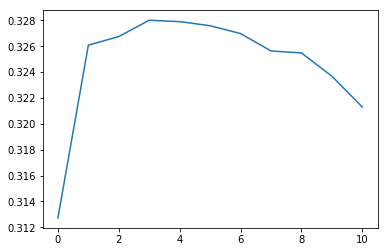

In [15]:
plt.plot(predictions[((1, 2,), 1)][4])

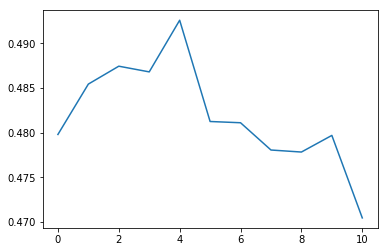

In [16]:
plt.plot(predictions[((1, 2,), 2)][4])

In [9]:
%%time
metrics = {}
predictions = {}
train_days = [2]
position_features_num = 1
metrics = [
    get_baseline_metric(
        train_days=train_days,
        test_days=[3],
        position_features_num=position_features_num,
    ) for i in range(10)
]
prediction = np.load("res/train_{}_test_3.npy".format('_'.join(map(str, train_days))))

 "2018-06-26 00:59:29.896736": preprocesing started
 "2018-06-26 00:59:32.709082":     base features shape: (142276, 17)
 "2018-06-26 00:59:32.712962":     0 features added
 "2018-06-26 00:59:32.713078":     base features included
 "2018-06-26 00:59:32.713118":     result shape: (142276, 17)
 "2018-06-26 00:59:32.715663": train features shape: (142276, 17)
 "2018-06-26 00:59:35.080973": preprocesing finished
 "2018-06-26 00:59:35.081072": start training on days [2]
 "2018-06-26 00:59:35.081201": using fit without validation
 "2018-06-26 01:02:40.419747": built 1000 trees
 "2018-06-26 01:02:40.419822": saving model in path "tmp_872509/tmp_model_trained_on_2"
 "2018-06-26 01:02:44.958392":     base features shape: (1565036, 17)
 "2018-06-26 01:02:44.989593":     0 features added
 "2018-06-26 01:02:44.989665":     base features included
 "2018-06-26 01:02:44.989700":     result shape: (1565036, 17)
 "2018-06-26 01:02:44.994931": days to predict: [3]
 "2018-06-26 01:02:44.995005": loaded m

 "2018-06-26 01:15:09.163786": preprocesing finished
 "2018-06-26 01:15:09.163883": start training on days [2]
 "2018-06-26 01:15:09.163901": using fit without validation
 "2018-06-26 01:17:16.808588": built 1000 trees
 "2018-06-26 01:17:16.808662": saving model in path "tmp_565085/tmp_model_trained_on_2"
 "2018-06-26 01:17:21.231742":     base features shape: (1565036, 17)
 "2018-06-26 01:17:21.264437":     0 features added
 "2018-06-26 01:17:21.264509":     base features included
 "2018-06-26 01:17:21.264663":     result shape: (1565036, 17)
 "2018-06-26 01:17:21.269164": days to predict: [3]
 "2018-06-26 01:17:21.269269": loaded model from: tmp_565085/tmp_model_trained_on_2
 "2018-06-26 01:17:21.269438": features shape: (1565036, 17)
 "2018-06-26 01:17:21.269465": start predicting on day 3
 "2018-06-26 01:17:25.750498": predictions shape: (142276, 11, 5)
 "2018-06-26 01:17:25.750638": saveing results to res/train_2_test_3
 "2018-06-26 01:17:26.033328": results saved
 "2018-06-26 01:

In [10]:
print('    ', metrics)
print('    ', np.mean(metrics))
print('    ', np.std(metrics) / np.sqrt(10))

     [0.6147226991841773, 0.6147662956169405, 0.6083744302055828, 0.6058434977622289, 0.6116349606120158, 0.6133843372118429, 0.6161848659117706, 0.6129610235632346, 0.6083092707904391, 0.6240094141490284]
     0.6130190795007261
     0.0015299063719664313


In [9]:
%%time
metrics = {}
predictions = {}
train_days = [2]
position_features_num = 1
metrics = [
    get_baseline_metric(
        train_days=train_days,
        test_days=[3],
        position_features_num=position_features_num,
        3
    ) for i in range(10)
]
prediction = np.load("res/train_{}_test_3.npy".format('_'.join(map(str, train_days))))

SyntaxError: positional argument follows keyword argument (<unknown>, line 10)